In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("accidents_2017_to_2023_english.csv")

# Basic exploration
print(df.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

In [3]:
print(df.describe())  # Statistical summary for numerical columns

             road_id         people         deaths  slightly_injured  \
count  462162.000000  463152.000000  463152.000000     463152.000000   
mean      213.432900       2.362373       0.079235          0.835469   
std       130.757607       1.924801       0.332169          1.075275   
min        10.000000       1.000000       0.000000          0.000000   
25%       101.000000       1.000000       0.000000          0.000000   
50%       163.000000       2.000000       0.000000          1.000000   
75%       324.000000       3.000000       0.000000          1.000000   
max       498.000000      80.000000      21.000000         61.000000   

       severely_injured      uninjured        ignored  total_injured  \
count     463152.000000  463152.000000  463152.000000  463152.000000   
mean           0.259530       1.044070       0.144069       1.094999   
std            0.602814       1.502419       0.438168       1.205351   
min            0.000000       0.000000       0.000000       0.0

In [4]:
df['parsed_date'] = pd.to_datetime(df['inverse_data'], format='%Y-%m-%d', errors='coerce')

# Define a function to determine the season based on specific date ranges
def get_season(date):
    if pd.isnull(date):  # Handle missing or invalid dates
        return "Unknown"
    month = date.month
    day = date.day

    # Summer: December 21 to March 20
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day <= 20):
        return "Summer"
    # Autumn: March 21 to June 20
    elif (month == 3 and day >= 21) or (month in [4, 5]) or (month == 6 and day <= 20):
        return "Autumn"
    # Winter: June 21 to September 20
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day <= 20):
        return "Winter"
    # Spring: September 21 to December 20
    elif (month == 9 and day >= 21) or (month in [10, 11]) or (month == 12 and day <= 20):
        return "Spring"
    return "None" 

# Apply the function to create the 'season' column
df['season'] = df['parsed_date'].apply(get_season)

# Display the first few rows to verify the new column
df[['inverse_data', 'season','parsed_date']].sample(20)


,inverse_data,season,parsed_date
169664,2019-08-26,Winter,2019-08-26
413176,2022-11-25,Spring,2022-11-25
101648,2018-08-27,Winter,2018-08-27
438473,2023-03-07,Summer,2023-03-07
420080,2023-01-26,Summer,2023-01-26
176600,2019-01-07,Summer,2019-01-07
169919,2019-09-03,Winter,2019-09-03
341916,2021-10-01,Spring,2021-10-01
46069,2017-04-19,Autumn,2017-04-19
441996,2023-04-03,Autumn,2023-04-03


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize outliers in numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns



Missing Values:
 inverse_data             0
week_day                 0
hour                     0
state                    0
road_id                990
km                     990
city                     0
cause_of_accident        0
type_of_accident         0
victims_condition        0
weather_timestamp        0
road_direction           0
wheather_condition       0
road_type                0
road_delineation         0
people                   0
deaths                   0
slightly_injured         0
severely_injured         0
uninjured                0
ignored                  0
total_injured            0
vehicles_involved        0
latitude                 0
longitude                0
regional                10
police_station        1310
parsed_date              0
season                   0
dtype: int64


In [5]:
weekday_map = {'monday': 1, 'tuesday': 2, 'wednesday': 3, 'thursday': 4, 
               'friday': 5, 'saturday': 6, 'sunday': 7}
df['DayOfWeekNum'] = df['week_day'].map(weekday_map)

print(df['DayOfWeekNum'].head())

0    7
1    7
2    7
3    7
4    7
Name: DayOfWeekNum, dtype: int64


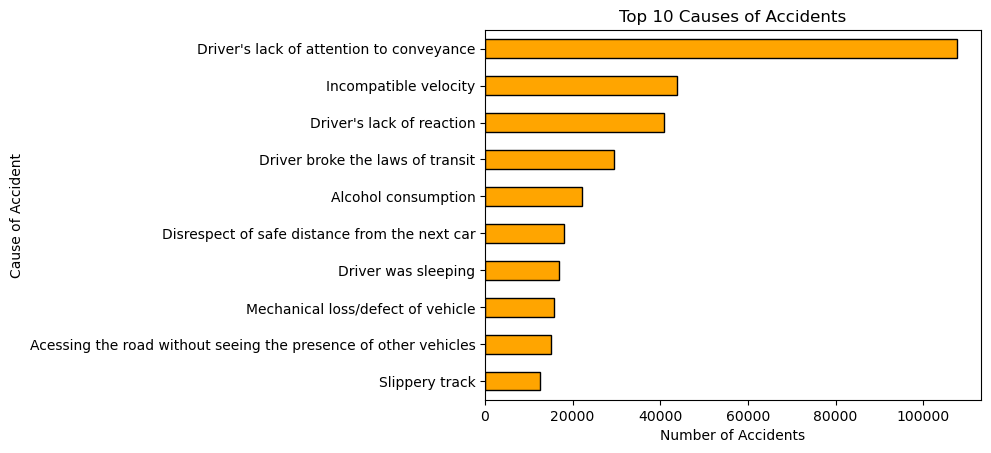

In [6]:
top_causes = df['cause_of_accident'].value_counts().head(10)
top_causes.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.gca().invert_yaxis()
plt.show()

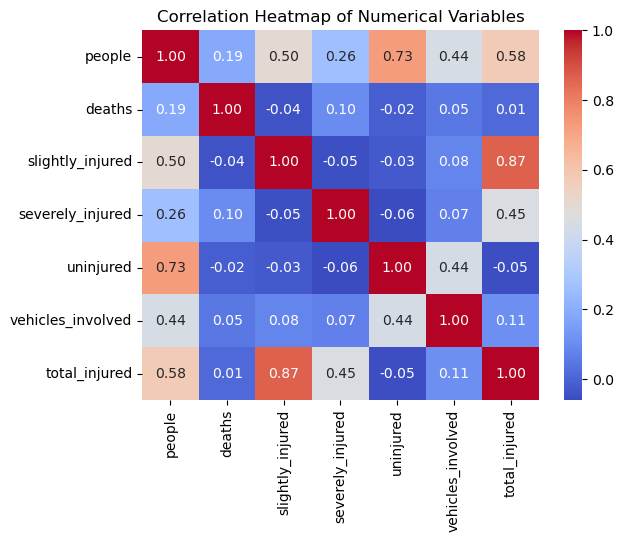

In [7]:
numerical_cols = ['people', 'deaths', 'slightly_injured', 'severely_injured', 
                  'uninjured', 'vehicles_involved', 'total_injured']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

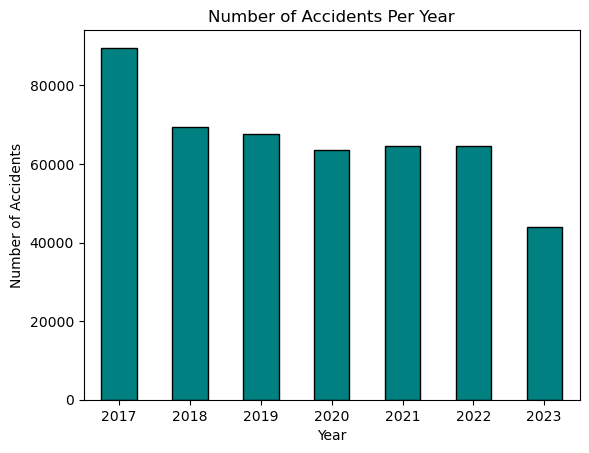

In [8]:
df['inverse_data'] = pd.to_datetime(df['inverse_data'], errors='coerce')

# Extract the year from the datetime column
df['year'] = df['inverse_data'].dt.year

# Calculate accidents per year
accidents_per_year = df['year'].value_counts().sort_index()

# Plot accidents per year
accidents_per_year.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

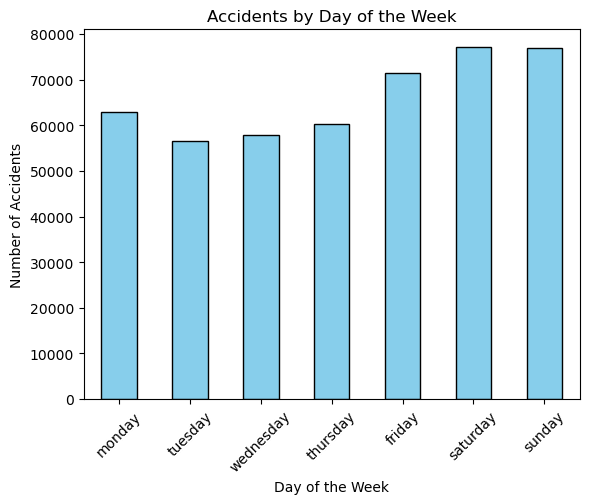

In [9]:
desired_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
week_day_counts = df['week_day'].value_counts()
week_day_counts = week_day_counts.reindex(desired_order)
week_day_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

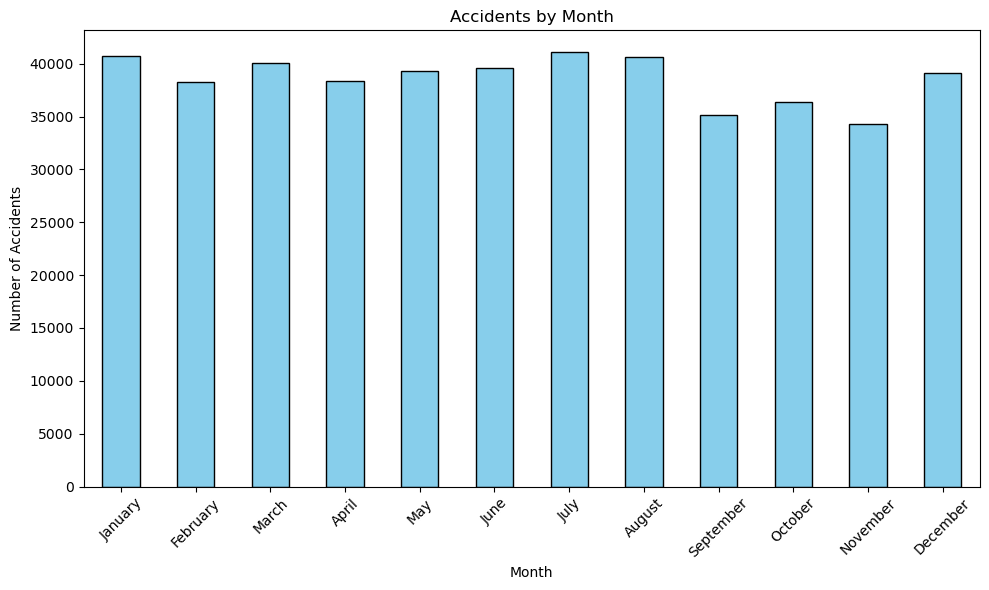

In [10]:
df['inverse_data'] = pd.to_datetime(df['inverse_data'], errors='coerce')

df['month'] = df['inverse_data'].dt.month_name()
month_counts = df['month'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Plot the number of accidents per month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


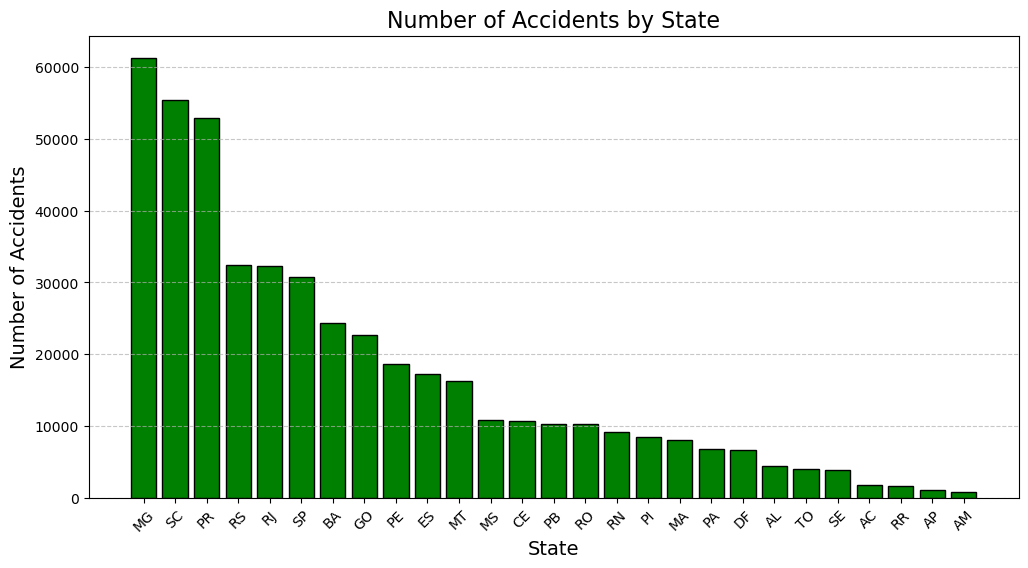

In [11]:
accidents_per_state = df['state'].value_counts()

# Histogram
plt.figure(figsize=(12, 6))
plt.bar(accidents_per_state.index, accidents_per_state.values, color='green', edgecolor='black')
plt.title('Number of Accidents by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

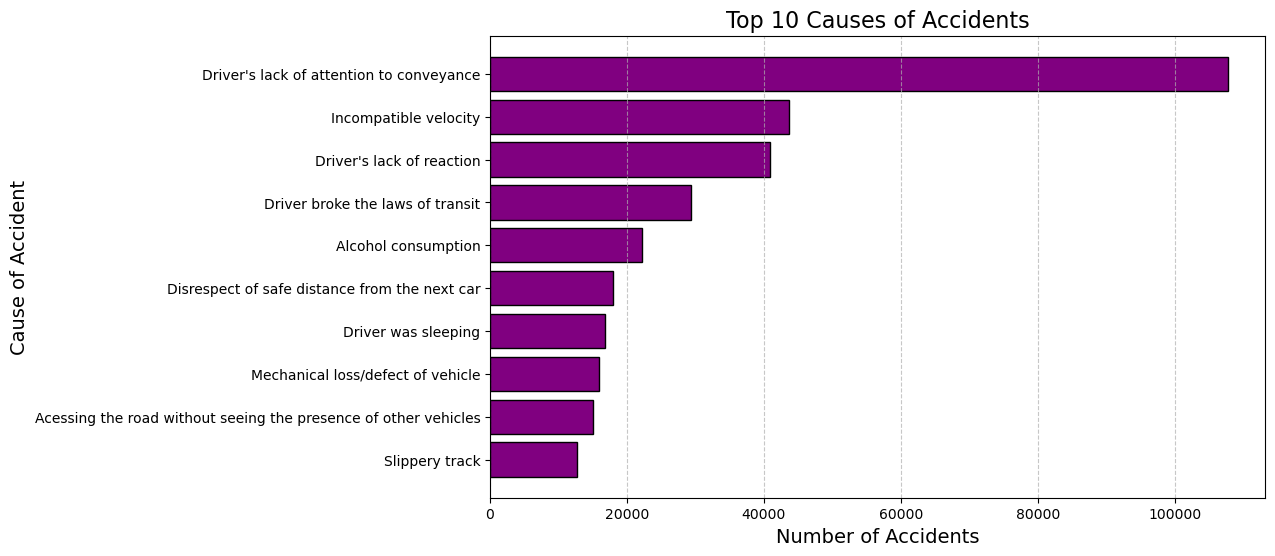

In [12]:
accidents_by_cause = df['cause_of_accident'].value_counts().head(10)

# Histogram
plt.figure(figsize=(10, 6))
plt.barh(accidents_by_cause.index, accidents_by_cause.values, color='purple', edgecolor='black')
plt.title('Top 10 Causes of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Cause of Accident', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

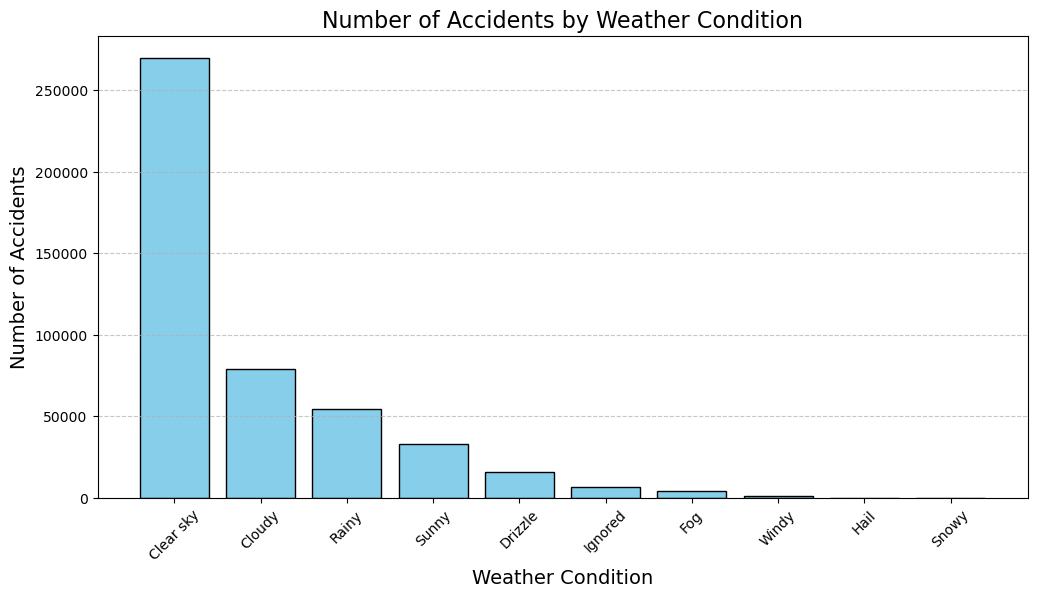

In [24]:
accidents_by_weather = df['wheather_condition'].value_counts()

# Histogram
plt.figure(figsize=(12, 6))
plt.bar(accidents_by_weather.index, accidents_by_weather.values, color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

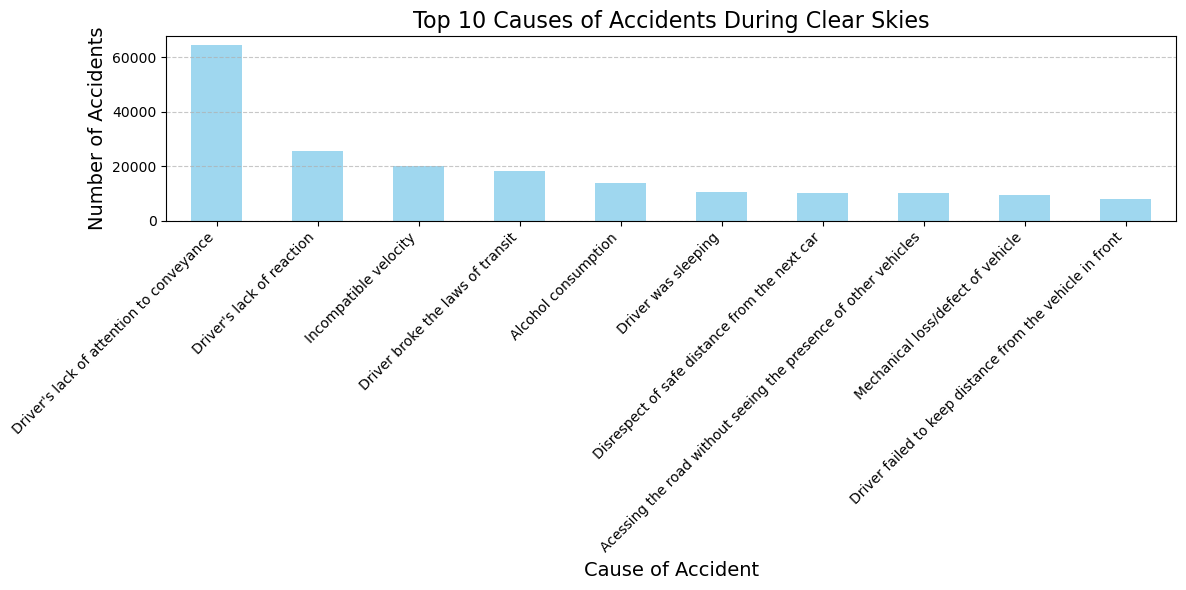

In [22]:
clear_sky_accidents = df[df['wheather_condition'].str.contains('Clear', case=False, na=False)]

# Summarize the causes of accidents during clear skies
clear_sky_causes_summary = clear_sky_accidents['cause_of_accident'].value_counts()

# Plot the summary as a bar chart
plt.figure(figsize=(12, 6))
clear_sky_causes_summary.head(10).plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Top 10 Causes of Accidents During Clear Skies', fontsize=16)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

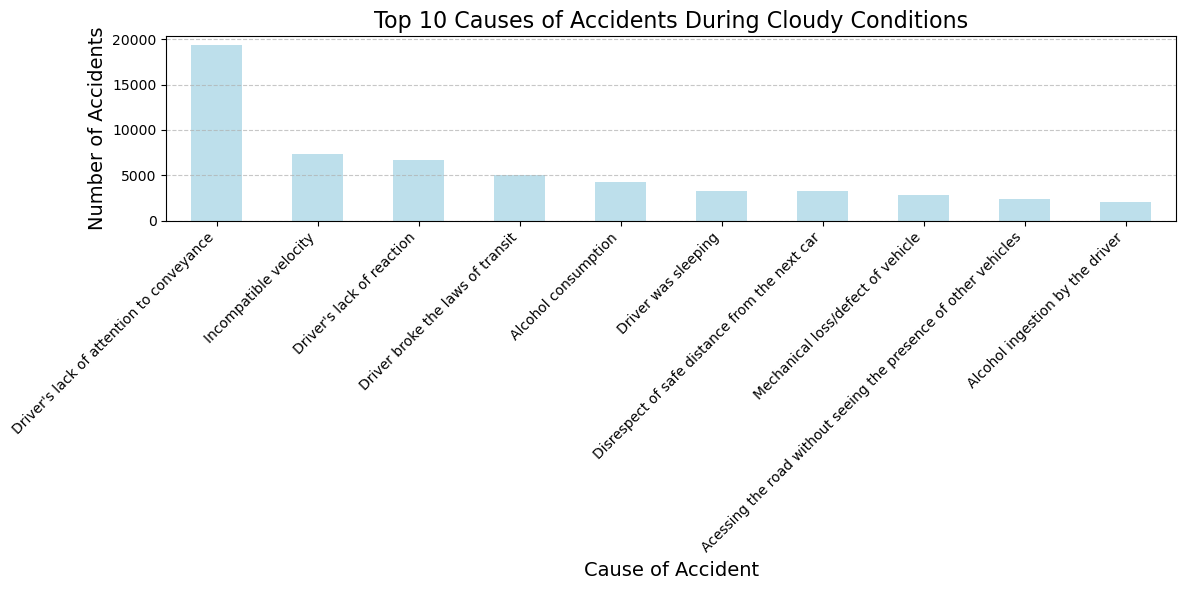

In [25]:
cloudy_accidents = df[df['wheather_condition'].str.contains('Cloudy', case=False, na=False)]

# Summarize the causes of accidents during cloudy conditions
cloudy_causes_summary = cloudy_accidents['cause_of_accident'].value_counts()

# Plot the summary as a bar chart
plt.figure(figsize=(12, 6))
cloudy_causes_summary.head(10).plot(kind='bar', color='lightblue', alpha=0.8)

plt.title('Top 10 Causes of Accidents During Cloudy Conditions', fontsize=16)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

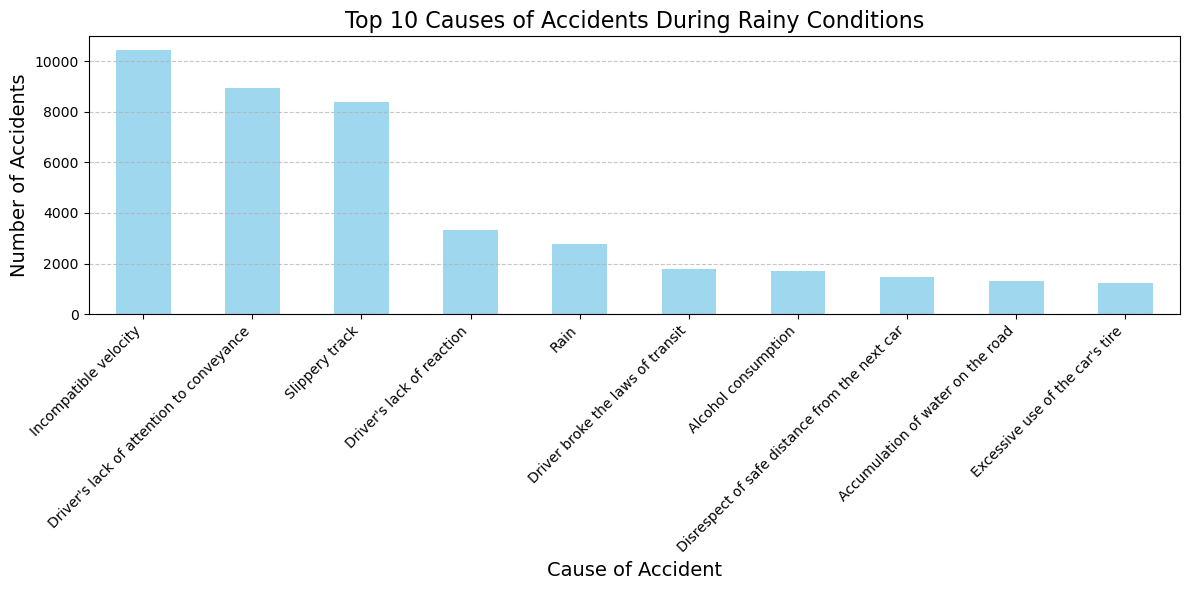

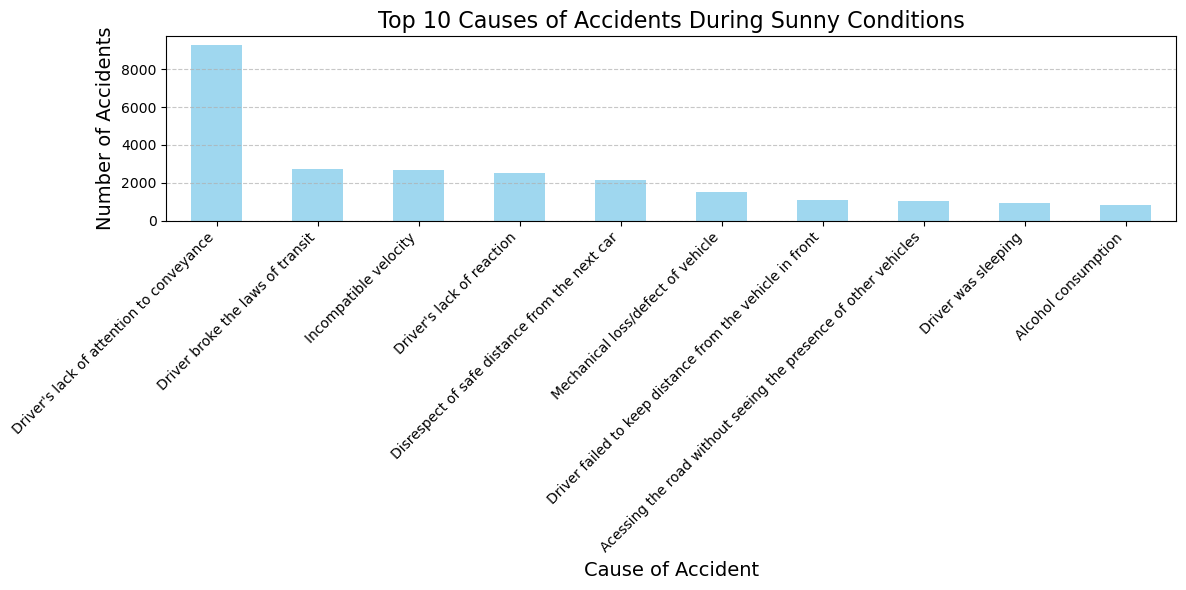

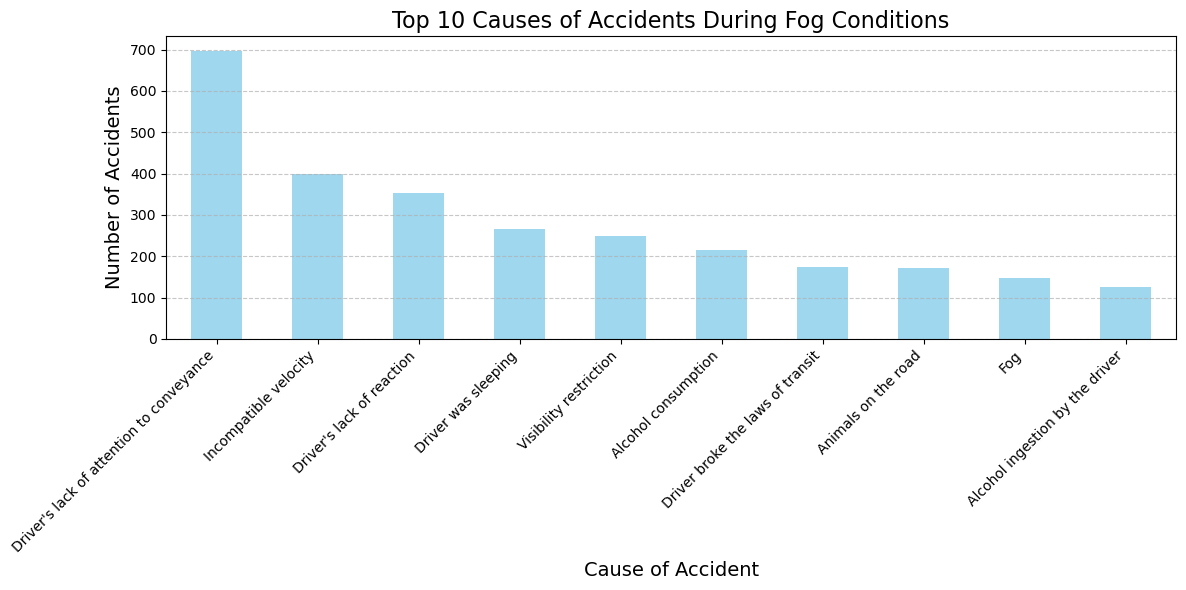

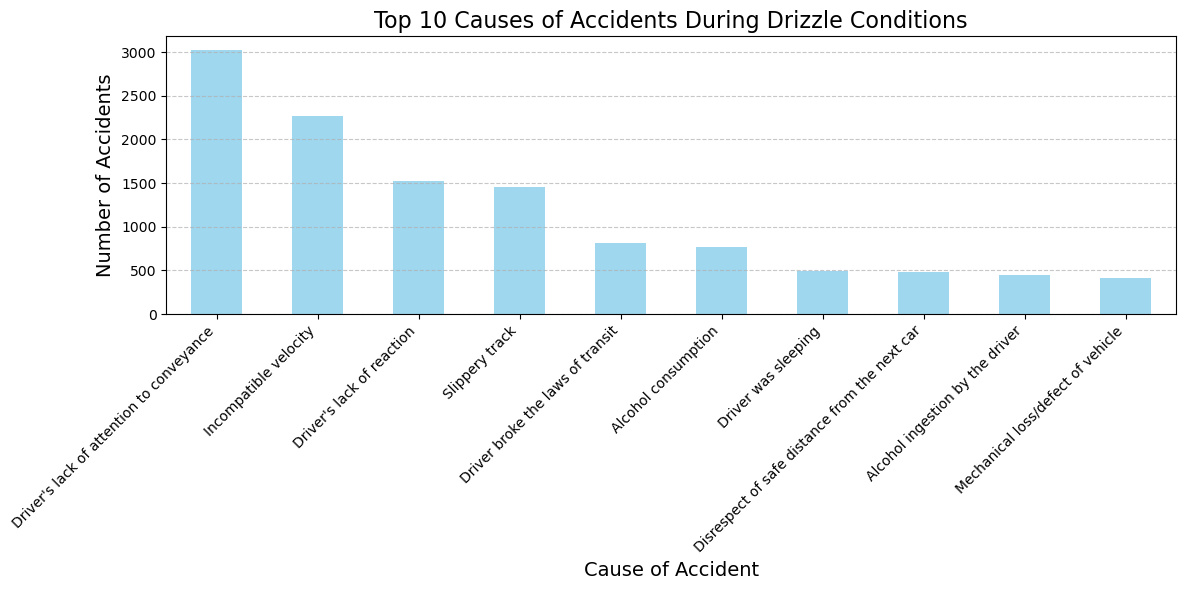

In [27]:
weather_conditions = ['Rainy', 'Sunny', 'Fog', 'Drizzle']

# Loop through each condition, filter the dataset, and plot the top 10 causes
for condition in weather_conditions:
    # Filter for accidents under the specific weather condition
    filtered_accidents = df[df['wheather_condition'].str.contains(condition, case=False, na=False)]
    
    # Summarize the causes of accidents
    causes_summary = filtered_accidents['cause_of_accident'].value_counts()
    
    # Plot the summary as a bar chart
    plt.figure(figsize=(12, 6))
    causes_summary.head(10).plot(kind='bar', color='skyblue', alpha=0.8)
    
    plt.title(f'Top 10 Causes of Accidents During {condition} Conditions', fontsize=16)
    plt.xlabel('Cause of Accident', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

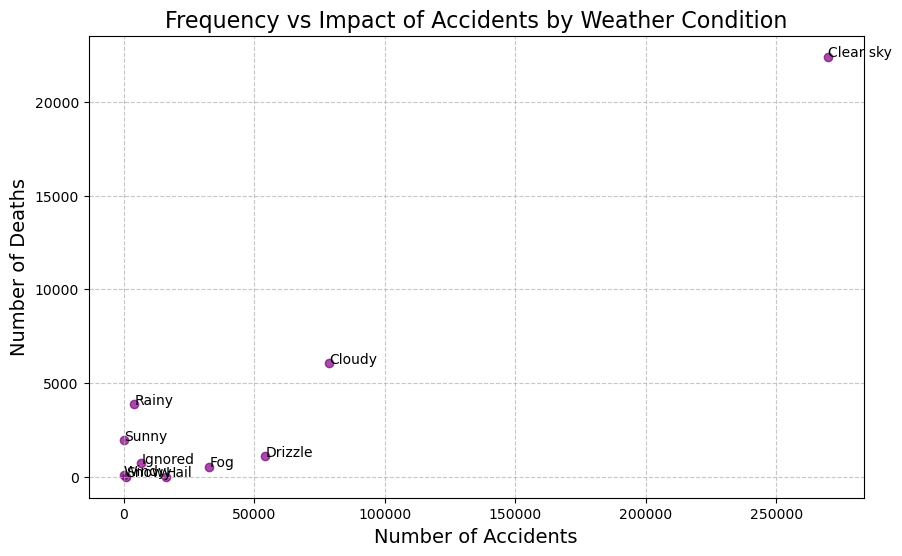

In [17]:
accidents_by_weather = df['wheather_condition'].value_counts()
impact_by_weather = df.groupby('wheather_condition')['deaths'].sum()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(accidents_by_weather.values, impact_by_weather.values, color='purple', alpha=0.7)

# Annotate each point with its weather condition
for i, txt in enumerate(impact_by_weather.index):
    plt.annotate(txt, (accidents_by_weather.iloc[i], impact_by_weather.iloc[i]))

plt.title('Frequency vs Impact of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Prepare the data
df['severe'] = (df['deaths'] > 0).astype(int)  # Target: 1 = severe, 0 = not severe

# Extract the hour as a numeric feature
df['hour_numeric'] = pd.to_datetime(df['hour'], format='%H:%M:%S', errors='coerce').dt.hour

# Define features and target
features = ['wheather_condition', 'cause_of_accident', 'hour_numeric', 'vehicles_involved']
data = df[features + ['severe']].dropna()  # Drop rows with missing values

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['wheather_condition', 'cause_of_accident'])

# Split the data into features and target
X = data_encoded.drop('severe', axis=1)
y = data_encoded['severe']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    129559
           1       0.36      0.03      0.06      9387

    accuracy                           0.93    138946
   macro avg       0.65      0.51      0.51    138946
weighted avg       0.90      0.93      0.90    138946

Confusion Matrix:
[[128994    565]
 [  9068    319]]


<Figure size 1400x800 with 0 Axes>

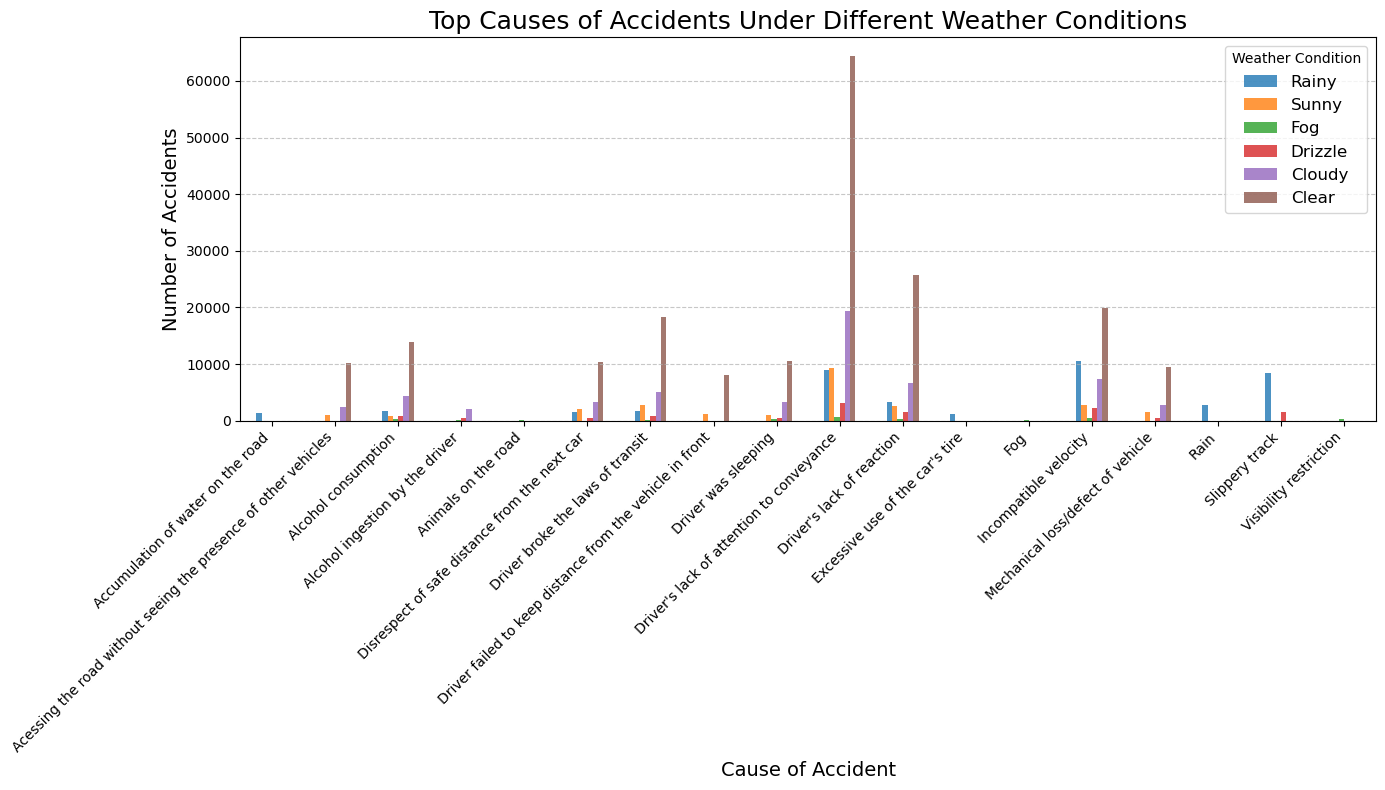

In [41]:
weather_conditions = ['Rainy', 'Sunny', 'Fog', 'Drizzle', 'Cloudy', 'Clear']

# Initialize a dictionary to store summarized data for each condition
summary_data = {}

# Loop through each condition and collect data
for condition in weather_conditions:
    # Filter the dataset for the specific weather condition
    filtered_accidents = df[
        df['wheather_condition'].str.contains(condition, case=False, na=False)
    ]
    # Summarize the causes of accidents
    causes_summary = filtered_accidents['cause_of_accident'].value_counts().head(10)
    summary_data[condition] = causes_summary

# Combine the data into a single DataFrame, filling NaN with 0
combined_df = pd.DataFrame(summary_data).fillna(0)

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
combined_df.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title('Top Causes of Accidents Under Different Weather Conditions', fontsize=18)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

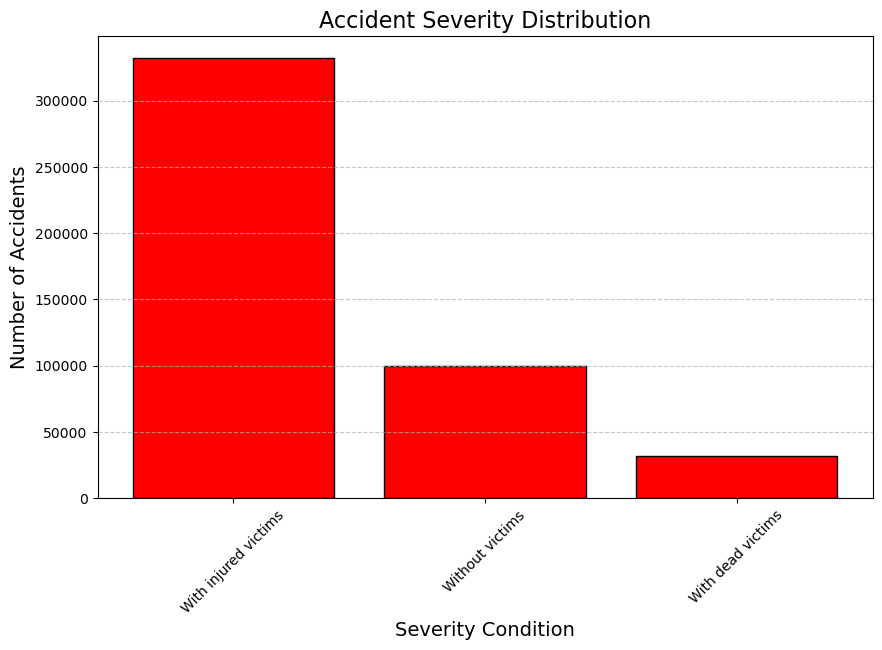

In [28]:
severity_counts = df['victims_condition'].value_counts()

# Histogram
plt.figure(figsize=(10, 6))
plt.bar(severity_counts.index, severity_counts.values, color='red', edgecolor='black')
plt.title('Accident Severity Distribution', fontsize=16)
plt.xlabel('Severity Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

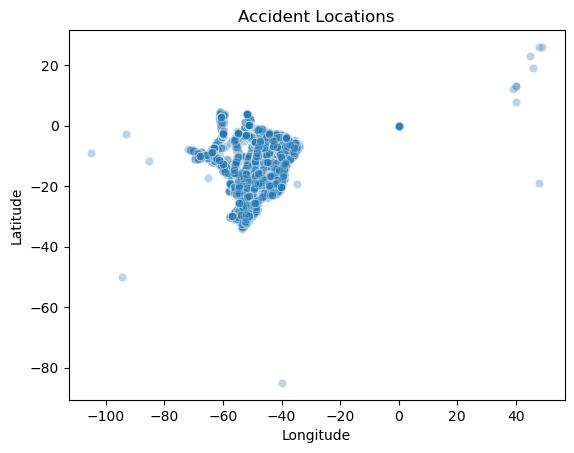

In [29]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Filter rows with valid latitude and longitude values
df_clean = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

# Plot the scatter plot
sns.scatterplot(x='longitude', y='latitude', data=df_clean, alpha=0.3)
plt.title('Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

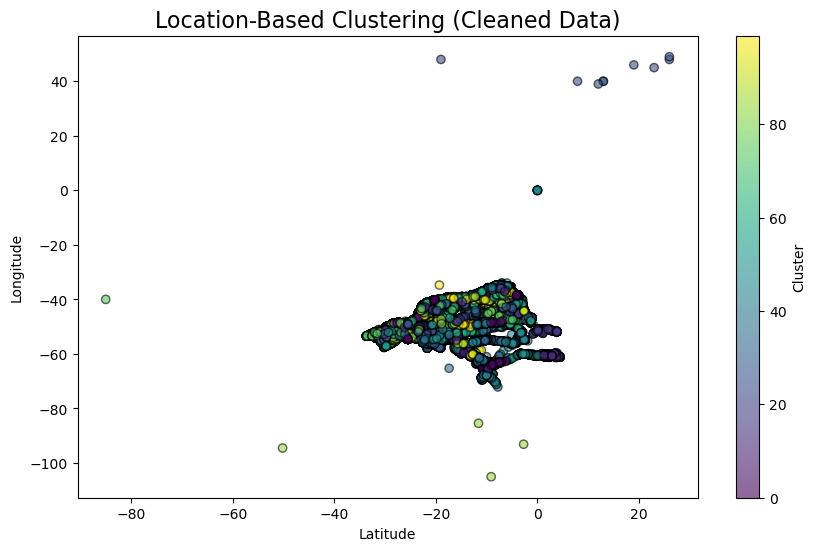

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Convert latitude and longitude to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Drop rows with NaN values after conversion (if any invalid values were coerced to NaN)
location_data = df[['latitude', 'longitude']].dropna()

valid_location_data = location_data[
    (location_data['latitude'] >= -90) & (location_data['latitude'] <= 90) &
    (location_data['longitude'] >= -180) & (location_data['longitude'] <= 180)
].copy()

scaled_data = scaler.fit_transform(valid_location_data[['latitude', 'longitude']])

# Apply K-Means clustering
valid_location_data.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    valid_location_data['latitude'], 
    valid_location_data['longitude'], 
    c=valid_location_data['Cluster'], 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors='k'
)
plt.title('Location-Based Clustering (Cleaned Data)', fontsize=16)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

#plot illustrates the clustering of geographic data points (latitude and longitude)
#into multiple clusters. Most points are densely grouped, forming a central pattern, 
#while a few are scattered as outliers.

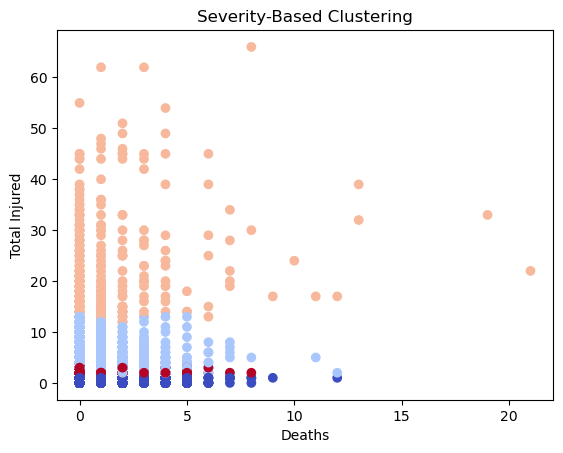

Cluster Centers:
[[ 0.08000729  0.67121582  0.1621847 ]
 [ 0.16592681  3.58079625  1.55283302]
 [ 1.30769231 22.42165242  4.66381766]
 [ 0.03491667  2.135125    0.21386111]]


In [36]:
severity_data = df[['deaths', 'total_injured', 'severely_injured']].fillna(0)

scaler = StandardScaler()
severity_data_scaled = scaler.fit_transform(severity_data[['deaths', 'total_injured', 'severely_injured']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
severity_data['Cluster'] = kmeans.fit_predict(severity_data)

# Visualize clusters
plt.scatter(severity_data['deaths'], severity_data['total_injured'], c=severity_data['Cluster'], cmap='coolwarm')
plt.title('Severity-Based Clustering')
plt.xlabel('Deaths')
plt.ylabel('Total Injured')
plt.show()

#showing average values of deaths, total_injured, and severely_injured 
print("Cluster Centers:")
print(kmeans.cluster_centers_)
#highlights patterns in severity outcomes by grouping similar incidents, 
#enabling insights into trends or categories of severity.

Dataset Statistics:
       vehicles_involved  total_injured      uninjured
count      463152.000000  463152.000000  463152.000000
mean            1.645725       1.094999       1.044070
std             0.731394       1.205351       1.502419
min             1.000000       0.000000       0.000000
25%             1.000000       0.000000       0.000000
50%             2.000000       1.000000       1.000000
75%             2.000000       1.000000       1.000000
max            23.000000      66.000000      73.000000


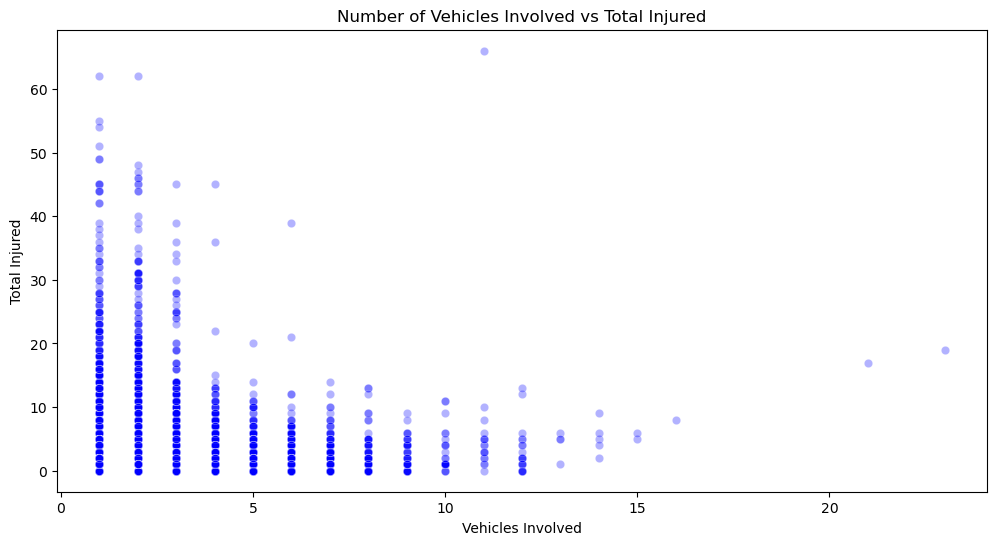

Model Evaluation for Total Injured:
Mean Squared Error (MSE): 1.2964563676684318
R-squared (R2): 0.012227768146799711
66


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_filtered = df[['vehicles_involved', 'total_injured', 'uninjured']].dropna()

# Convert columns to numeric (handle any formatting issues)
df_filtered['vehicles_involved'] = pd.to_numeric(df_filtered['vehicles_involved'], errors='coerce')
df_filtered['total_injured'] = pd.to_numeric(df_filtered['total_injured'], errors='coerce')
df_filtered['uninjured'] = pd.to_numeric(df_filtered['uninjured'], errors='coerce')

# Drop any remaining NaN rows
df_filtered = df_filtered.dropna()

# Display basic statistics
print("Dataset Statistics:")
print(df_filtered.describe())

# Step 4: Visualize the relationships
# Vehicles Involved vs Total Injured
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='vehicles_involved', y='total_injured', alpha=0.3, color='blue')
plt.title('Number of Vehicles Involved vs Total Injured')
plt.xlabel('Vehicles Involved')
plt.ylabel('Total Injured')
plt.show()

# Step 5: Prepare the data for regression
X = df_filtered[['vehicles_involved']]  # Feature
y_total_injured = df_filtered['total_injured']  # Target 1

# Split the data into training and testing sets
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total_injured, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression models
model_total_injured = LinearRegression()

# Fit the models
model_total_injured.fit(X_train, y_train_total)

# Step 7: Evaluate the models
y_pred_total = model_total_injured.predict(X_test)

mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)


print("Model Evaluation for Total Injured:")
print(f"Mean Squared Error (MSE): {mse_total}")
print(f"R-squared (R2): {r2_total}")

print(df_filtered['total_injured'].max())
# Step 8: Make Predictions for a range of vehicles involved
# showing the density of the, separate it, make the graph clean.

In [5]:
# Make Predictions for a range of vehicles involved
vehicles_range = pd.DataFrame({'vehicles_involved': np.arange(1, 11)})

# Predict total_injured and uninjured
pred_total_injured = model_total_injured.predict(vehicles_range)

# Combine predictions into a DataFrame
predictions_df = vehicles_range.copy()
predictions_df['predicted_total_injured'] = np.round(pred_total_injured, 2)

# Display the predictions
print("\nPredictions for Vehicles Involved (1 to 10):")
print(predictions_df)

#The model suggests that more vehicles involved in an accident tends to result in more uninjured individuals and a gradual increase in injuries.


Predictions for Vehicles Involved (1 to 10):
   vehicles_involved  predicted_total_injured
0                  1                     0.98
1                  2                     1.16
2                  3                     1.34
3                  4                     1.52
4                  5                     1.71
5                  6                     1.89
6                  7                     2.07
7                  8                     2.25
8                  9                     2.43
9                 10                     2.61


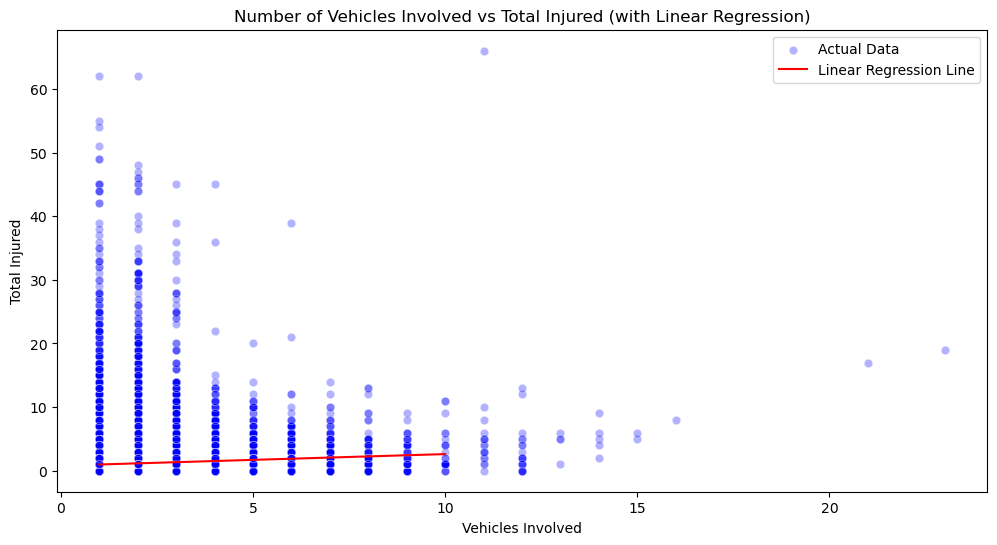

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual Data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='vehicles_involved', y='total_injured', alpha=0.3, color='blue', label='Actual Data')

# Plot the Regression Line
plt.plot(vehicles_range['vehicles_involved'], pred_total_injured, color='red', label='Linear Regression Line')

# Customize the Plot
plt.title('Number of Vehicles Involved vs Total Injured (with Linear Regression)')
plt.xlabel('Vehicles Involved')
plt.ylabel('Total Injured')
plt.legend()
plt.show()

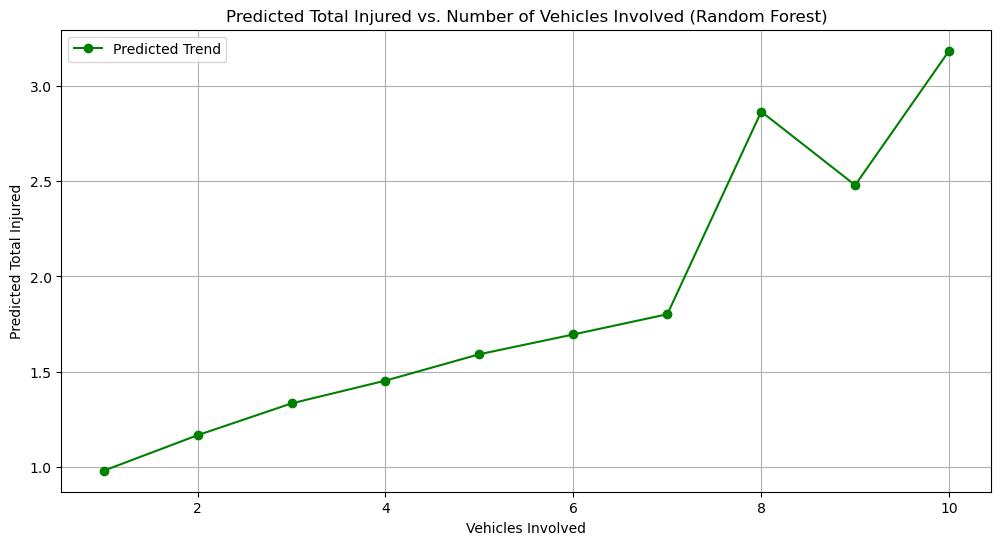

In [49]:
# Visualization 2: Predicted Trend for a Range of Vehicles Involved
plt.figure(figsize=(12, 6))
plt.plot(vehicles_range['vehicles_involved'], pred_total_injured_rf, color='green', marker='o', label='Predicted Trend')
plt.title('Predicted Total Injured vs. Number of Vehicles Involved (Random Forest)')
plt.xlabel('Vehicles Involved')
plt.ylabel('Predicted Total Injured')
plt.legend()
plt.grid()
plt.show()


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Load and Prepare Data
# Assuming 'df_filtered' is already prepared with columns 'vehicles_involved' and 'total_injured'
df_filtered = df[['vehicles_involved', 'total_injured']].dropna()
df_filtered['vehicles_involved'] = pd.to_numeric(df_filtered['vehicles_involved'], errors='coerce')
df_filtered['total_injured'] = pd.to_numeric(df_filtered['total_injured'], errors='coerce')

# Features and Target
X = df_filtered[['vehicles_involved']]  # Feature: Number of vehicles involved
y = df_filtered['total_injured']       # Target: Total injured

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model_rf.predict(X_test)

# Step 4: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Step 5: Make Predictions for a Range of Vehicles Involved
vehicles_range = pd.DataFrame({'vehicles_involved': np.arange(1, 11)})
pred_total_injured_rf = model_rf.predict(vehicles_range)

# Combine predictions into a DataFrame
predictions_df_rf = vehicles_range.copy()
predictions_df_rf['predicted_total_injured'] = np.round(pred_total_injured_rf, 2)

# Display the predictions
print("\nPredictions for Vehicles Involved (1 to 10):")
print(predictions_df_rf)

Random Forest Regression Model Evaluation:
Mean Squared Error (MSE): 1.2972293587808705
R-squared (R2): 0.011638824951041071

Predictions for Vehicles Involved (1 to 10):
   vehicles_involved  predicted_total_injured
0                  1                     0.98
1                  2                     1.17
2                  3                     1.33
3                  4                     1.45
4                  5                     1.59
5                  6                     1.69
6                  7                     1.80
7                  8                     2.87
8                  9                     2.48
9                 10                     3.19



Model Evaluation:
Mean Squared Error (MSE): 1.296130948267809
R-squared (R2): 0.012475705721605723

Predictions for Multiple Weather Conditions Including Clear Sky:
    vehicles_involved wheather_condition  predicted_total_injured
0                   1              Rainy                     1.03
1                   2              Sunny                     1.18
2                   3                Fog                     1.43
3                   4          Clear sky                     1.52
4                   5              Rainy                     1.76
5                   1              Sunny                     0.99
6                   2                Fog                     1.25
7                   3          Clear sky                     1.34
8                   4              Rainy                     1.58
9                   5              Sunny                     1.72
10                  1                Fog                     1.07
11                  2          Clear sky  

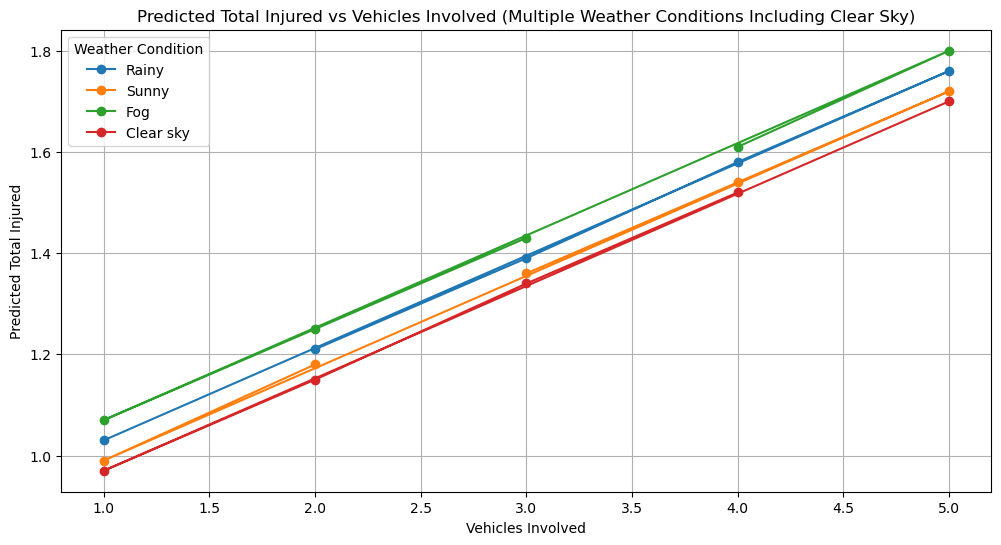

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant columns and handle missing values
df_filtered = df[['vehicles_involved', 'total_injured', 'uninjured', 'wheather_condition']].dropna()

# Convert columns to numeric where applicable
df_filtered['vehicles_involved'] = pd.to_numeric(df_filtered['vehicles_involved'], errors='coerce')
df_filtered['total_injured'] = pd.to_numeric(df_filtered['total_injured'], errors='coerce')
df_filtered['uninjured'] = pd.to_numeric(df_filtered['uninjured'], errors='coerce')

# Add 'Clear Sky' if missing
if 'Clear sky' not in df_filtered['wheather_condition'].unique():
    clear_sky_data = pd.DataFrame({
        'vehicles_involved': [1, 2, 3, 4, 5],
        'total_injured': [0, 1, 2, 3, 4],
        'uninjured': [1, 2, 3, 4, 5],
        'wheather_condition': ['Clear Sky'] * 5
    })
    df_filtered = pd.concat([df_filtered, clear_sky_data], ignore_index=True)

# One-hot encode the wheather_condition column for all weather conditions
weather_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('weather', weather_encoder, ['wheather_condition'])  # Encode all weather conditions
    ],
    remainder='passthrough'  # Keep other numeric columns
)

# Combine preprocessing with linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Features and target
X = df_filtered[['vehicles_involved', 'wheather_condition']]
y = df_filtered['total_injured']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Predict injuries for a range of vehicles across multiple weather conditions, including "Clear Sky"
vehicles_range = pd.DataFrame({
    'vehicles_involved': np.tile(np.arange(1, 6), 4),  # Repeated range of vehicles (1 to 5)
    'wheather_condition': ['Rainy', 'Sunny', 'Fog', 'Clear sky'] * 5  # Include "Clear Sky"
})
pred_total_injured = pipeline.predict(vehicles_range)

# Combine predictions into a DataFrame
predictions_df = vehicles_range.copy()
predictions_df['predicted_total_injured'] = np.round(pred_total_injured, 2)

# Display predictions
print("\nPredictions for Multiple Weather Conditions Including Clear Sky:")
print(predictions_df)

# Visualize Predictions
plt.figure(figsize=(12, 6))
for weather in vehicles_range['wheather_condition'].unique():
    subset = predictions_df[predictions_df['wheather_condition'] == weather]
    plt.plot(subset['vehicles_involved'], subset['predicted_total_injured'], marker='o', label=weather)

plt.title('Predicted Total Injured vs Vehicles Involved (Multiple Weather Conditions Including Clear Sky)')
plt.xlabel('Vehicles Involved')
plt.ylabel('Predicted Total Injured')
plt.legend(title='Weather Condition')
plt.grid()
plt.show()